In [8]:
%pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.9/304.9 kB 339.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.2/150.2 kB 376.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 269.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 350.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 101.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
import pandas as pd
from datasets_tourism import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler

> 2024-09-30 11:53:21,977 [info] Project loaded successfully: {'project_name': 'overtourism'}


In [10]:
START_DATE = "2023-07-01"
END_DATE = "2023-09-30"
SPECIFIC_DAY = "2023-07-29"

# Analyse the attendance at spiaggia

In [11]:
contapersone_presenze_df.rename(columns={"data": "date"}, inplace=True)
contapersone_presenze_df["date"] = pd.to_datetime(contapersone_presenze_df["date"]) # or contapersone_presenze_df["date"].map(pd.to_datetime)
#contapersone_presenze_df = contapersone_presenze_df[(contapersone_presenze_df['date'] >= START_DATE) & (contapersone_presenze_df['date'] <= END_DATE)] 

varchi = contapersone_presenze_df['varco'].unique()
contapersone = contapersone_presenze_df.copy()
for v in varchi:
    contapersone[v] = contapersone['presenze'] * (contapersone['varco'] == v)
contapersone = contapersone.drop(columns=['varco']).groupby('date').sum().reset_index().rename(columns={'presenze':'contapersone'})
contapersone

,date,contapersone,Varco 1,Varco 2,Varco 3,Varco 4,Varco 5,Varco 6,Varco 7,Varco 8,Varco 9
0,2023-07-15,1496,183,204,304,199,117,83,161,105,140
1,2023-07-16,2143,299,305,340,321,157,137,228,106,250
2,2023-07-17,1663,175,262,307,144,135,77,140,64,359
3,2023-07-18,1518,129,300,280,152,117,83,146,73,238
4,2023-07-19,1345,111,153,309,109,130,65,137,55,276
...,...,...,...,...,...,...,...,...,...,...,...
65,2023-09-18,1081,61,55,107,152,50,73,174,77,332
66,2023-09-19,1468,104,69,175,210,83,141,249,116,321
67,2023-09-20,1699,187,52,122,206,121,123,260,105,523
68,2023-09-21,2382,427,83,114,390,236,185,343,185,419


In [12]:
print(f"Standard deviation: {contapersone['contapersone'].std()}, Mean: {contapersone['contapersone'].mean()}")

Standard deviation: 1029.2480119904703, Mean: 2238.5285714285715


In [13]:
scaler = StandardScaler()
contapersone["contapersone_scaled"] = scaler.fit_transform(contapersone[["contapersone"]])
contapersone

,date,contapersone,Varco 1,Varco 2,Varco 3,Varco 4,Varco 5,Varco 6,Varco 7,Varco 8,Varco 9,contapersone_scaled
0,2023-07-15,1496,183,204,304,199,117,83,161,105,140,-0.726637
1,2023-07-16,2143,299,305,340,321,157,137,228,106,250,-0.093484
2,2023-07-17,1663,175,262,307,144,135,77,140,64,359,-0.563211
3,2023-07-18,1518,129,300,280,152,117,83,146,73,238,-0.705108
4,2023-07-19,1345,111,153,309,109,130,65,137,55,276,-0.874406
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2023-09-18,1081,61,55,107,152,50,73,174,77,332,-1.132755
66,2023-09-19,1468,104,69,175,210,83,141,249,116,321,-0.754038
67,2023-09-20,1699,187,52,122,206,121,123,260,105,523,-0.527982
68,2023-09-21,2382,427,83,114,390,236,185,343,185,419,0.140401


## Vodafone attendances

In [268]:
LOC_ID_LAGO_MOLVENO = "LAGO_MOLV"
LOC_ID_COMUNE_MOLVENO = "27"
LOC_ID_APT_MOLVENO = "105"
LOC_ID_COMUNE_ANDALO = "166"


attendances_timeframe_df = vodafone_attendences_ALL_df[
    (vodafone_attendences_ALL_df["date"] >= START_DATE) &
    (vodafone_attendences_ALL_df["date"] <= END_DATE) &
    (vodafone_attendences_ALL_df["value"] != 0) &
    (vodafone_attendences_ALL_df["userProfile"] != 'INHABITANT') &
    (vodafone_attendences_ALL_df["userProfile"] != 'COMMUTER') &
    ((vodafone_attendences_ALL_df["locId"] == LOC_ID_APT_MOLVENO) | 
         (vodafone_attendences_ALL_df["locId"] == LOC_ID_COMUNE_MOLVENO) | 
         (vodafone_attendences_ALL_df["locId"] == LOC_ID_COMUNE_ANDALO) | 
         (vodafone_attendences_ALL_df["locId"] == LOC_ID_LAGO_MOLVENO))
]
attendances_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value
2976672,2023-07-01,TN_MKT_AL_3,166,CZE,TOURIST,CZ,18
2976674,2023-07-01,TN_MKT_AL_3,166,DEU,TOURIST,DE,22
2976675,2023-07-01,TN_MKT_AL_3,166,DEU,VISITOR,DE,32
2976676,2023-07-01,TN_MKT_AL_3,166,DNK,TOURIST,UE,18
2976686,2023-07-01,TN_MKT_AL_3,166,ISR,TOURIST,None,36
...,...,...,...,...,...,...,...
4821882,2023-09-30,TN_MKT_AL_3,27,STR,VISITOR,STR,581
4822040,2023-09-30,TN_MKT_AM_22,105,STR,TOURIST,STR,3941
4822041,2023-09-30,TN_MKT_AM_22,105,STR,VISITOR,STR,1976
4822063,2023-09-30,TN_MKT_POI,LAGO_MOLV,STR,TOURIST,STR,934


# Compare the ratio of tourists on the beach to the tourists in Molveno

In [269]:
grouped_vodafone_presences = vodafone_attendences_df.groupby(["date", "locId", "userProfile"])[["value"]].sum().reset_index()
grouped_vodafone_presences

,date,locId,userProfile,value
0,2022-01-01,100,COMMUTER,250
1,2022-01-01,100,INHABITANT,5749
2,2022-01-01,100,TOURIST,17429
3,2022-01-01,100,VISITOR,5929
4,2022-01-01,101,COMMUTER,308
...,...,...,...,...
478703,2024-03-31,STAZ_ROVE,VISITOR,1002
478704,2024-03-31,STAZ_TREN,COMMUTER,189
478705,2024-03-31,STAZ_TREN,INHABITANT,1561
478706,2024-03-31,STAZ_TREN,TOURIST,332


In [270]:
# presences in Molveno
vod_presences_molveno = grouped_vodafone_presences[grouped_vodafone_presences["locId"] == LOC_ID_COMUNE_MOLVENO]
vod_presences_molveno

,date,locId,userProfile,value
318,2022-01-01,27,COMMUTER,80
319,2022-01-01,27,INHABITANT,1115
320,2022-01-01,27,TOURIST,4550
321,2022-01-01,27,VISITOR,3130
895,2022-01-02,27,COMMUTER,68
...,...,...,...,...
477864,2024-03-30,27,VISITOR,623
478446,2024-03-31,27,COMMUTER,22
478447,2024-03-31,27,INHABITANT,785
478448,2024-03-31,27,TOURIST,930


In [271]:
# presences on the beach
vod_presences_lago = grouped_vodafone_presences[grouped_vodafone_presences["locId"] == LOC_ID_LAGO_MOLVENO]
vod_presences_lago

,date,locId,userProfile,value
552,2022-01-01,LAGO_MOLV,COMMUTER,53
553,2022-01-01,LAGO_MOLV,INHABITANT,755
554,2022-01-01,LAGO_MOLV,TOURIST,3375
555,2022-01-01,LAGO_MOLV,VISITOR,1565
1129,2022-01-02,LAGO_MOLV,COMMUTER,51
...,...,...,...,...
478102,2024-03-30,LAGO_MOLV,VISITOR,327
478682,2024-03-31,LAGO_MOLV,COMMUTER,0
478683,2024-03-31,LAGO_MOLV,INHABITANT,767
478684,2024-03-31,LAGO_MOLV,TOURIST,848


In [272]:
import numpy as np
merged_presences_molveno_lago = vod_presences_molveno.merge(vod_presences_lago, on=["date", "userProfile"], suffixes=('_molveno', '_lago'))
merged_presences_molveno_lago["date"] = pd.to_datetime(merged_presences_molveno_lago["date"])
merged_presences_molveno_lago

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago
0,2022-01-01,27,COMMUTER,80,LAGO_MOLV,53
1,2022-01-01,27,INHABITANT,1115,LAGO_MOLV,755
2,2022-01-01,27,TOURIST,4550,LAGO_MOLV,3375
3,2022-01-01,27,VISITOR,3130,LAGO_MOLV,1565
4,2022-01-02,27,COMMUTER,68,LAGO_MOLV,51
...,...,...,...,...,...,...
3271,2024-03-30,27,VISITOR,623,LAGO_MOLV,327
3272,2024-03-31,27,COMMUTER,22,LAGO_MOLV,0
3273,2024-03-31,27,INHABITANT,785,LAGO_MOLV,767
3274,2024-03-31,27,TOURIST,930,LAGO_MOLV,848


In [284]:
merged_presences_molveno_lago["ratio_lago_comune"] = (merged_presences_molveno_lago["value_lago"] / merged_presences_molveno_lago["value_molveno"]) * 100
merged_presences_molveno_lago = merged_presences_molveno_lago[
    (merged_presences_molveno_lago["date"] >= START_DATE) &
    (merged_presences_molveno_lago["date"] <= END_DATE) &
    (merged_presences_molveno_lago["userProfile"].isin(["TOURIST", "VISITOR"]))
]    
merged_presences_molveno_lago = merged_presences_molveno_lago[merged_presences_molveno_lago["date"].isin(contapersone["date"])]
# TODO
merged_presences_molveno_lago["ratio_lago_comune"] = merged_presences_molveno_lago["ratio_lago_comune"].replace(np.inf, 0).fillna(0)
merged_presences_molveno_lago["ratio_lago_comune"] = merged_presences_molveno_lago["ratio_lago_comune"].apply(lambda el: int(el))
merged_presences_molveno_lago.sort_values(by=["ratio_lago_comune"], ascending=False)

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune
2502,2023-09-18,27,VISITOR,617,LAGO_MOLV,593,96
2365,2023-08-15,27,TOURIST,4848,LAGO_MOLV,4519,93
2369,2023-08-16,27,TOURIST,5075,LAGO_MOLV,4675,92
2277,2023-07-24,27,TOURIST,3578,LAGO_MOLV,3265,91
2309,2023-08-01,27,TOURIST,3261,LAGO_MOLV,2967,90
...,...,...,...,...,...,...,...
2306,2023-07-31,27,VISITOR,3289,LAGO_MOLV,1895,57
2290,2023-07-27,27,VISITOR,3687,LAGO_MOLV,2099,56
2314,2023-08-02,27,VISITOR,3327,LAGO_MOLV,1853,55
2286,2023-07-26,27,VISITOR,3835,LAGO_MOLV,2120,55


In [44]:
tourists_presences = merged_presences_molveno_lago[merged_presences_molveno_lago["userProfile"] == "TOURIST"]
excursionist_presences = merged_presences_molveno_lago[merged_presences_molveno_lago["userProfile"] == "VISITOR"]
#scaler for tourists values
tourists_presences["ratio_lago_comune_scaled"] = scaler.fit_transform(tourists_presences[["ratio_lago_comune"]]) 
tourists_presences["presenze_lago"] = scaler.fit_transform(tourists_presences[["value_lago"]]) 
tourists_presences.sort_values(by=["ratio_lago_comune"], ascending=False)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,ratio_lago_comune_scaled,presenze_lago
2365,2023-08-15,27,TOURIST,4848,LAGO_MOLV,4519,93,2.560597,1.552265
2369,2023-08-16,27,TOURIST,5075,LAGO_MOLV,4675,92,2.236471,1.715195
2277,2023-07-24,27,TOURIST,3578,LAGO_MOLV,3265,91,1.912344,0.242560
2309,2023-08-01,27,TOURIST,3261,LAGO_MOLV,2967,90,1.588218,-0.068678
2393,2023-08-22,27,TOURIST,4253,LAGO_MOLV,3825,89,1.264092,0.827436
...,...,...,...,...,...,...,...,...,...
2497,2023-09-17,27,TOURIST,2044,LAGO_MOLV,1635,79,-1.977170,-1.459849
2517,2023-09-22,27,TOURIST,2550,LAGO_MOLV,2015,79,-1.977170,-1.062968
2501,2023-09-18,27,TOURIST,1377,LAGO_MOLV,1085,78,-2.301296,-2.034281
2509,2023-09-20,27,TOURIST,1768,LAGO_MOLV,1384,78,-2.301296,-1.721999


In [45]:
excursionist_presences["ratio_lago_comune_scaled"] = scaler.fit_transform(excursionist_presences[["ratio_lago_comune"]]) 
excursionist_presences["presenze_lago"] = scaler.fit_transform(excursionist_presences[["value_lago"]]) 
excursionist_presences.sort_values(by=["ratio_lago_comune"], ascending=False)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,ratio_lago_comune_scaled,presenze_lago
2502,2023-09-18,27,VISITOR,617,LAGO_MOLV,593,96,3.840057,-1.275876
2482,2023-09-13,27,VISITOR,644,LAGO_MOLV,585,90,3.052545,-1.281774
2518,2023-09-22,27,VISITOR,646,LAGO_MOLV,561,86,2.527538,-1.299466
2414,2023-08-27,27,VISITOR,1498,LAGO_MOLV,1200,80,1.740026,-0.828409
2366,2023-08-15,27,VISITOR,8808,LAGO_MOLV,6723,76,1.215018,3.243026
...,...,...,...,...,...,...,...,...,...
2494,2023-09-16,27,VISITOR,2823,LAGO_MOLV,1634,57,-1.278769,-0.508474
2290,2023-07-27,27,VISITOR,3687,LAGO_MOLV,2099,56,-1.410021,-0.165686
2286,2023-07-26,27,VISITOR,3835,LAGO_MOLV,2120,55,-1.541273,-0.150205
2278,2023-07-24,27,VISITOR,1820,LAGO_MOLV,1003,55,-1.541273,-0.973633


<Axes: xlabel='value_lago', ylabel='ratio_lago_comune'>

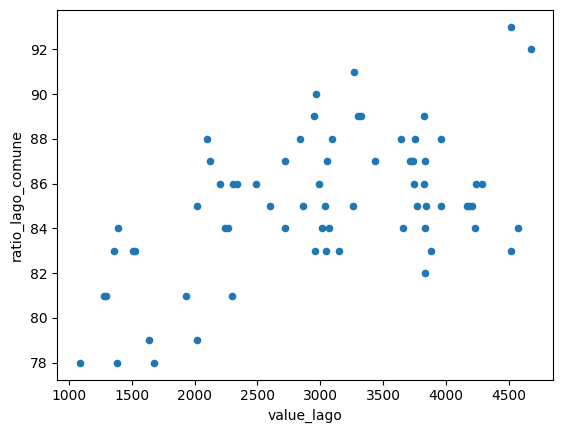

In [46]:
tourists_presences.plot.scatter(x="value_lago", y="ratio_lago_comune")

<Axes: xlabel='value_lago', ylabel='ratio_lago_comune'>

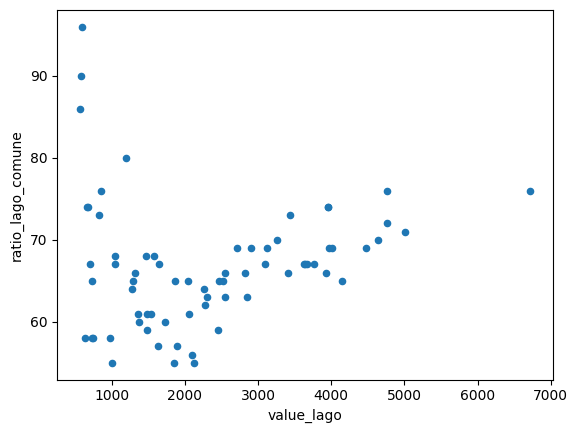

In [47]:
excursionist_presences.plot.scatter(x="value_lago", y="ratio_lago_comune")

In [48]:
excursionist_presences.describe()

,date,value_molveno,value_lago,ratio_lago_comune,ratio_lago_comune_scaled,presenze_lago
count,70,70.000000,70.000000,70.000000,7.000000e+01,7.000000e+01
mean,2023-08-18 12:00:00,3457.685714,2323.757143,66.742857,-5.709718e-16,9.198991e-17
min,2023-07-15 00:00:00,617.000000,561.000000,55.000000,-1.541273e+00,-1.299466e+00
25%,2023-08-01 06:00:00,1964.000000,1286.500000,61.250000,-7.209482e-01,-7.646434e-01
50%,2023-08-18 12:00:00,3423.000000,2077.000000,66.000000,-9.750145e-02,-1.819040e-01
75%,2023-09-04 18:00:00,4677.000000,3371.250000,69.000000,2.962544e-01,7.721889e-01
max,2023-09-22 00:00:00,8808.000000,6723.000000,96.000000,3.840057e+00,3.243026e+00
std,NaN,1889.485871,1366.318596,7.673946,1.007220e+00,1.007220e+00


<Axes: xlabel='date'>

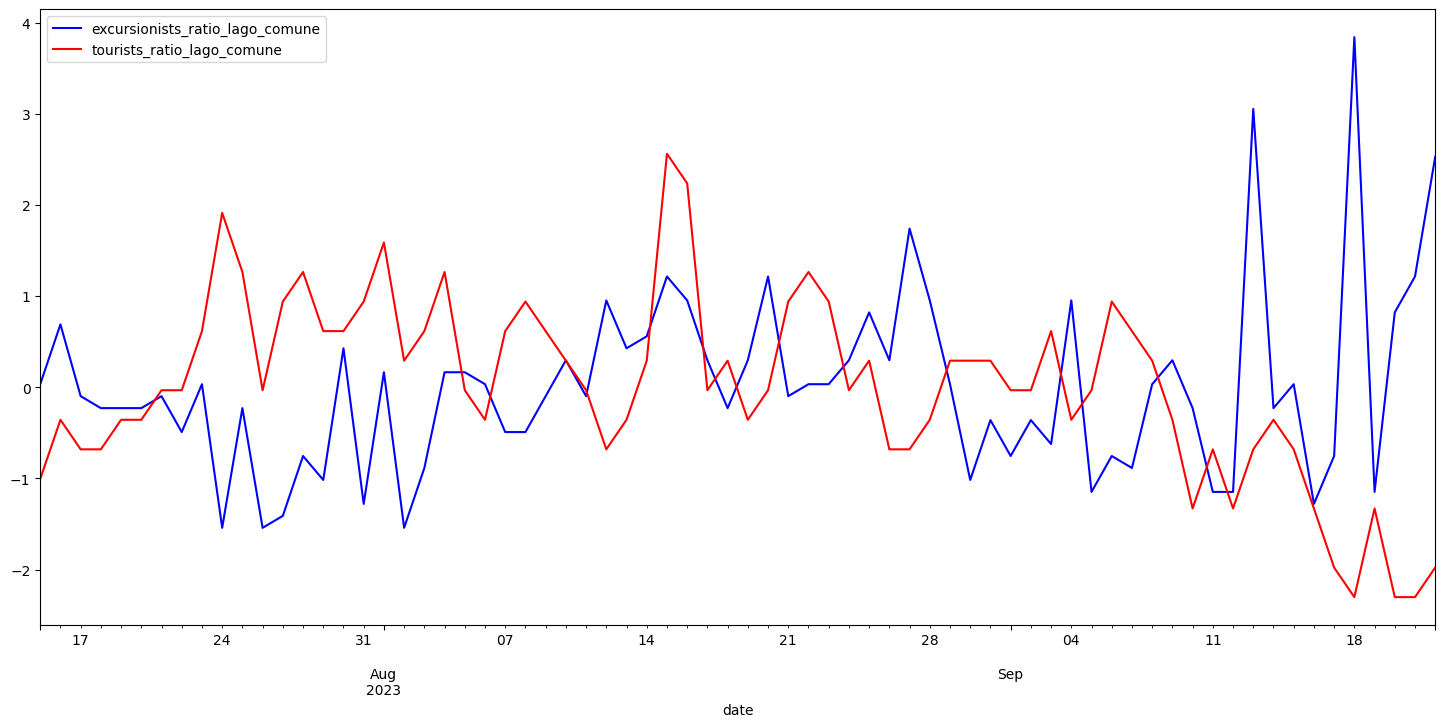

In [49]:
#TODO
ax = excursionist_presences[["date", "ratio_lago_comune_scaled", "userProfile"]].plot(kind="line", x="date", y="ratio_lago_comune_scaled", label="excursionists_ratio_lago_comune", color="blue")
tourists_presences[["date", "ratio_lago_comune_scaled", "userProfile"]].plot(kind="line", ax=ax, x="date", y="ratio_lago_comune_scaled", label="tourists_ratio_lago_comune", color="red", figsize=(18, 8))

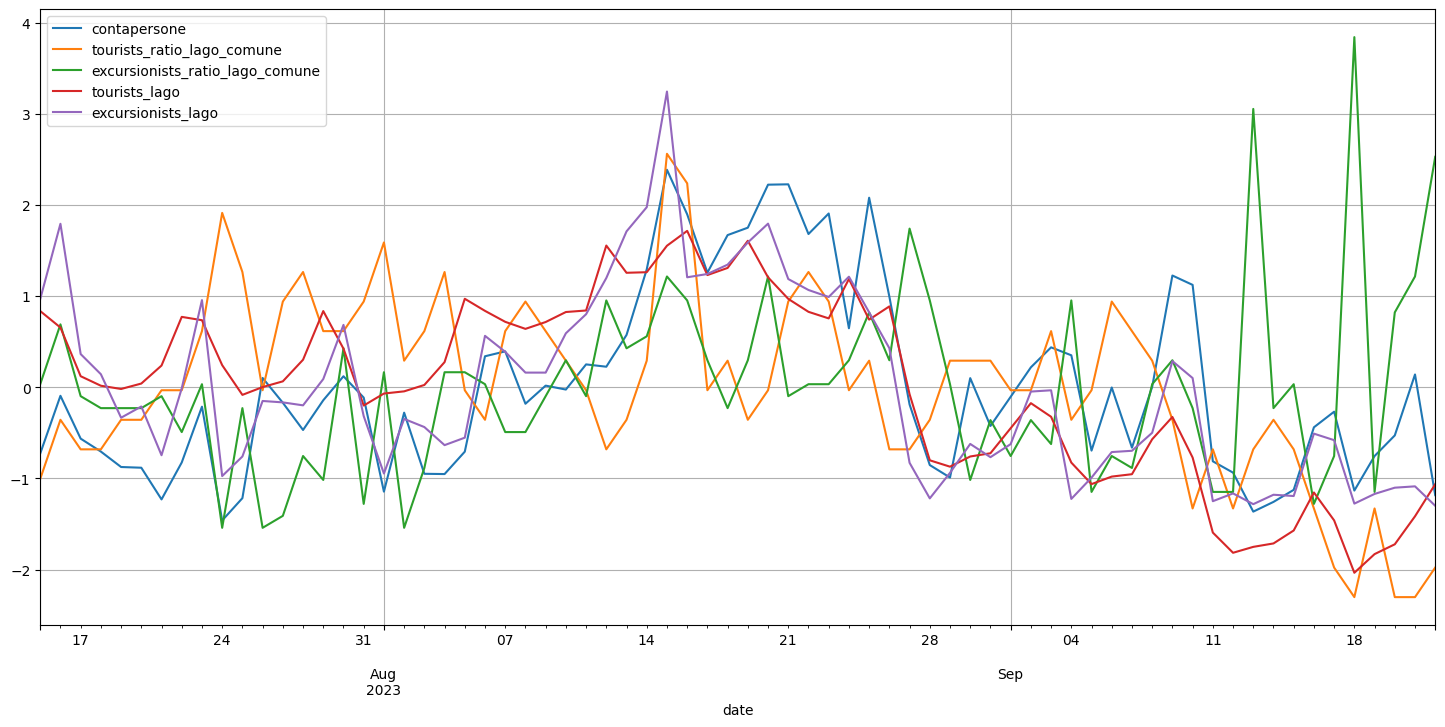

In [50]:
ax = contapersone[["date", "contapersone_scaled"]].plot(x="date", y="contapersone_scaled", label="contapersone")
tourists_presences[["date", "ratio_lago_comune_scaled"]].plot(ax=ax, x="date", y="ratio_lago_comune_scaled", label="tourists_ratio_lago_comune")
excursionist_presences[["date", "ratio_lago_comune_scaled"]].plot(ax=ax, x="date", y="ratio_lago_comune_scaled", label="excursionists_ratio_lago_comune")

tourists_presences[["date", "presenze_lago"]].plot(ax=ax,x="date", y="presenze_lago", label="tourists_lago")
excursionist_presences[["date", "presenze_lago"]].plot(ax=ax, x="date", y="presenze_lago", label="excursionists_lago", figsize=(18,8))
plt.grid()

In [51]:
vodafone_contapersone_df = pd.concat([
    excursionist_presences[["date", "ratio_lago_comune_scaled", "presenze_lago"]].set_index("date").rename(columns={"presenze_lago": "presenze_lago_excusrionists", "ratio_lago_comune_scaled": "ratio_lago_comune_scaled_excursionists"}),
    tourists_presences[["date", "ratio_lago_comune_scaled", "presenze_lago"]].set_index("date").rename(columns={"presenze_lago": "presenze_lago_tourists", "ratio_lago_comune_scaled": "ratio_lago_comune_scaled_tourists"}),
    contapersone[["date", "contapersone_scaled"]].set_index("date")
], axis=1)
vodafone_contapersone_df.corr()

,ratio_lago_comune_scaled_excursionists,presenze_lago_excusrionists,ratio_lago_comune_scaled_tourists,presenze_lago_tourists,contapersone_scaled
ratio_lago_comune_scaled_excursionists,1.000000,0.109677,-0.298525,0.012172,0.125345
presenze_lago_excusrionists,0.109677,1.000000,0.350007,0.842538,0.775338
ratio_lago_comune_scaled_tourists,-0.298525,0.350007,1.000000,0.533939,0.272408
presenze_lago_tourists,0.012172,0.842538,0.533939,1.000000,0.597868
contapersone_scaled,0.125345,0.775338,0.272408,0.597868,1.000000


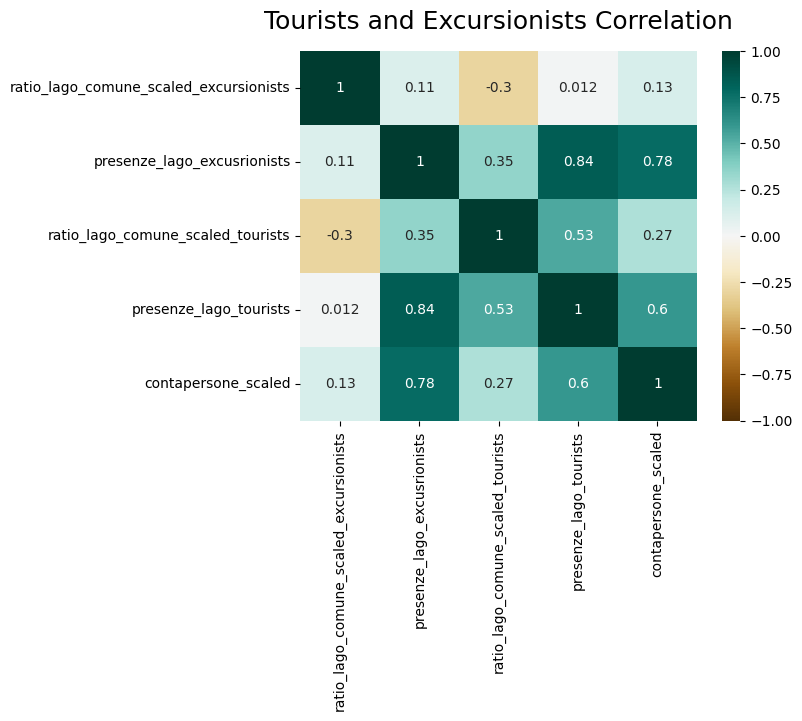

In [52]:
import seaborn as sns
heatmap = sns.heatmap(vodafone_contapersone_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Tourists and Excursionists Correlation', fontdict={'fontsize':18}, pad=16);

In [53]:
vodafone_contapersone_df = pd.concat([
    excursionist_presences[["date", "ratio_lago_comune", "value_lago"]].set_index("date").rename(columns={"value_lago": "value_lago_excusrionists", "ratio_lago_comune": "ratio_lago_comune_excursionists"}),
    tourists_presences[["date", "ratio_lago_comune", "value_lago"]].set_index("date").rename(columns={"value_lago": "value_lago_tourists", "ratio_lago_comune": "ratio_lago_comune_tourists"}),
    contapersone[["date", "contapersone"]].set_index("date")
], axis=1)

vodafone_contapersone_df.reset_index(inplace=True)
vodafone_contapersone_df

,date,ratio_lago_comune_excursionists,value_lago_excusrionists,ratio_lago_comune_tourists,value_lago_tourists,contapersone
0,2023-07-15,67,3636,82,3833,1496
1,2023-07-16,72,4756,84,3660,2143
2,2023-07-17,66,2818,83,3149,1663
3,2023-07-18,65,2518,83,3049,1518
4,2023-07-19,65,1871,84,3015,1345
...,...,...,...,...,...,...
65,2023-09-18,96,593,78,1085,1081
66,2023-09-19,58,737,81,1281,1468
67,2023-09-20,73,830,78,1384,1699
68,2023-09-21,76,850,78,1678,2382


## Ferragosto Timeframe

In [256]:
ferragosto_vod_contapersone_df = vodafone_contapersone_df[(vodafone_contapersone_df["date"] >= "2023-08-08") & (vodafone_contapersone_df["date"] <= "2023-08-25")]
ferragosto_vod_contapersone_df

,date,ratio_lago_comune_excursionists,value_lago_excusrionists,ratio_lago_comune_tourists,value_lago_tourists,contapersone
24,2023-08-08,63,2542,88,3646,2054
25,2023-08-09,66,2542,87,3718,2257
26,2023-08-10,69,3127,86,3823,2213
27,2023-08-11,66,3411,85,3839,2495
28,2023-08-12,74,3949,83,4521,2469
29,2023-08-13,70,4643,84,4235,2825
30,2023-08-14,71,5003,86,4241,3560
31,2023-08-15,76,6723,93,4519,4676
32,2023-08-16,74,3960,92,4675,4177
33,2023-08-17,69,4009,85,4211,3523


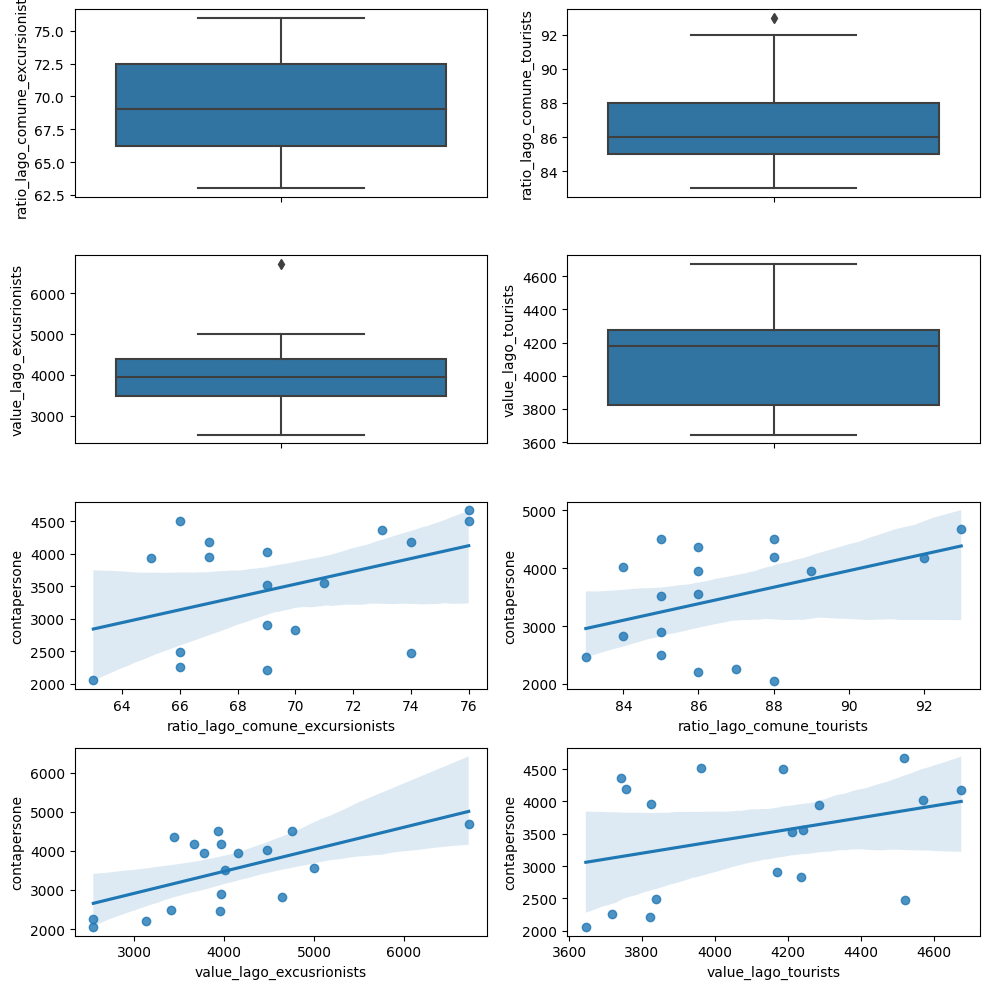

In [257]:
fig, axs = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))
sns.boxplot(y=ferragosto_vod_contapersone_df["ratio_lago_comune_excursionists"], ax = axs[0, 0])
sns.boxplot(y=ferragosto_vod_contapersone_df["ratio_lago_comune_tourists"], ax = axs[0, 1])
sns.boxplot(y=ferragosto_vod_contapersone_df["value_lago_excusrionists"], ax = axs[1, 0])
sns.boxplot(y=ferragosto_vod_contapersone_df["value_lago_tourists"], ax = axs[1, 1])
sns.regplot(y = ferragosto_vod_contapersone_df['contapersone'], x = ferragosto_vod_contapersone_df['ratio_lago_comune_excursionists'], ax = axs[2, 0])
sns.regplot(y = ferragosto_vod_contapersone_df['contapersone'], x = ferragosto_vod_contapersone_df['ratio_lago_comune_tourists'], ax = axs[2, 1])
sns.regplot(y = ferragosto_vod_contapersone_df['contapersone'], x = ferragosto_vod_contapersone_df['value_lago_excusrionists'], ax = axs[3, 0])
sns.regplot(y = ferragosto_vod_contapersone_df['contapersone'], x = ferragosto_vod_contapersone_df['value_lago_tourists'], ax = axs[3, 1])
plt.tight_layout()

## Before Ferragosto Timeframe

In [254]:
before_ferragosto_vod_contapersone_df = vodafone_contapersone_df[(vodafone_contapersone_df["date"] >= "2023-07-20") & (vodafone_contapersone_df["date"] <= "2023-08-08")]
before_ferragosto_vod_contapersone_df

,date,ratio_lago_comune_excursionists,value_lago_excusrionists,ratio_lago_comune_tourists,value_lago_tourists,contapersone
5,2023-07-20,65,2038,84,3072,1337
6,2023-07-21,66,1313,85,3261,982
7,2023-07-22,63,2308,85,3772,1396
8,2023-07-23,67,3621,87,3737,2021
9,2023-07-24,55,1003,91,3265,746
10,2023-07-25,65,1294,89,2953,996
11,2023-07-26,55,2120,85,3035,2343
12,2023-07-27,56,2099,88,3095,2065
13,2023-07-28,61,2055,89,3322,1760
14,2023-07-29,59,2446,87,3833,2093


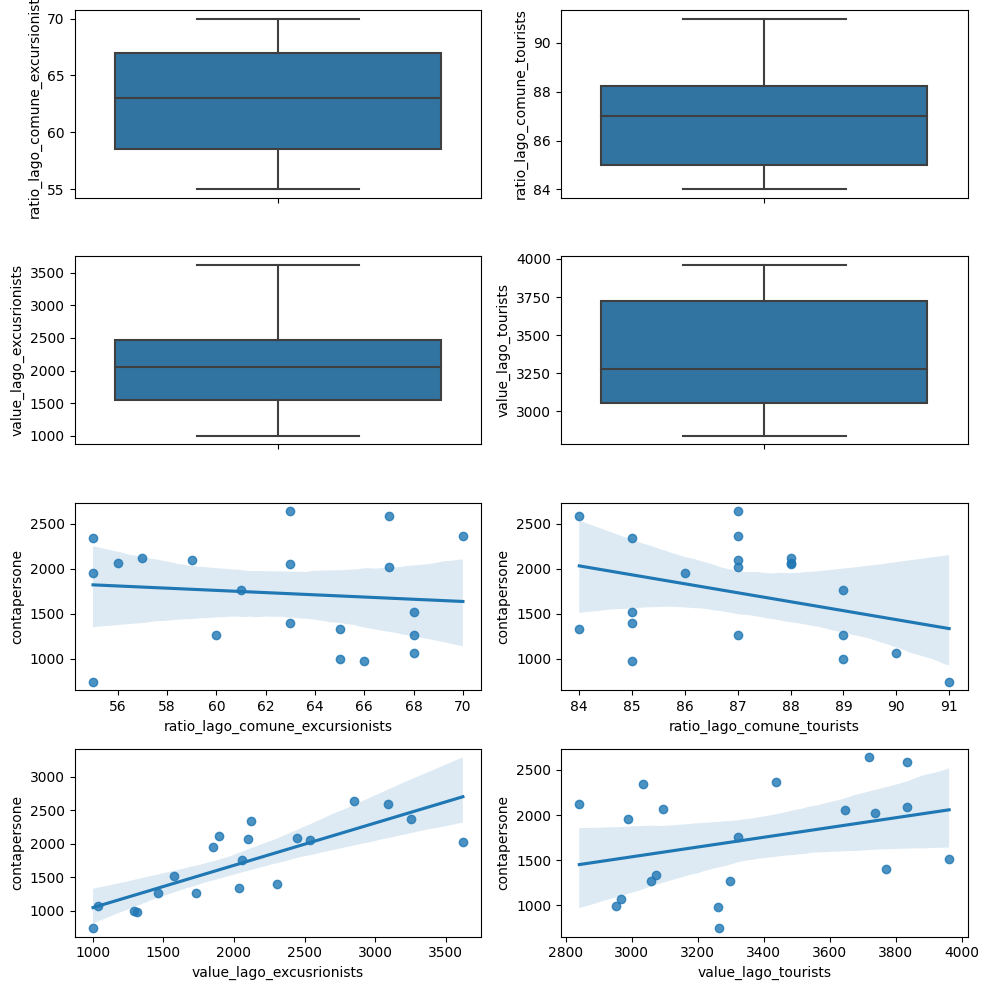

In [255]:
fig, axs = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))
sns.boxplot(y=before_ferragosto_vod_contapersone_df["ratio_lago_comune_excursionists"], ax = axs[0, 0])
sns.boxplot(y=before_ferragosto_vod_contapersone_df["ratio_lago_comune_tourists"], ax = axs[0, 1])
sns.boxplot(y=before_ferragosto_vod_contapersone_df["value_lago_excusrionists"], ax = axs[1, 0])
sns.boxplot(y=before_ferragosto_vod_contapersone_df["value_lago_tourists"], ax = axs[1, 1])
sns.regplot(y = before_ferragosto_vod_contapersone_df['contapersone'], x = before_ferragosto_vod_contapersone_df['ratio_lago_comune_excursionists'], ax = axs[2, 0])
sns.regplot(y = before_ferragosto_vod_contapersone_df['contapersone'], x = before_ferragosto_vod_contapersone_df['ratio_lago_comune_tourists'], ax = axs[2, 1])
sns.regplot(y = before_ferragosto_vod_contapersone_df['contapersone'], x = before_ferragosto_vod_contapersone_df['value_lago_excusrionists'], ax = axs[3, 0])
sns.regplot(y = before_ferragosto_vod_contapersone_df['contapersone'], x = before_ferragosto_vod_contapersone_df['value_lago_tourists'], ax = axs[3, 1])
plt.tight_layout()

## After Ferragosto Timeframe

In [248]:
after_ferragosto_vod_contapersone_df = vodafone_contapersone_df[(vodafone_contapersone_df["date"] >= "2023-08-22") & (vodafone_contapersone_df["date"] <= "2023-09-01")]
after_ferragosto_vod_contapersone_df

,date,ratio_lago_comune_excursionists,value_lago_excusrionists,ratio_lago_comune_tourists,value_lago_tourists,contapersone
38,2023-08-22,67,3771,89,3825,3956
39,2023-08-23,67,3667,88,3756,4186
40,2023-08-24,69,3969,85,4170,2900
41,2023-08-25,73,3439,86,3743,4363
42,2023-08-26,69,2905,83,3882,3255
43,2023-08-27,80,1200,83,2960,2046
44,2023-08-28,74,671,84,2266,1367
45,2023-08-29,67,1051,86,2199,1227
46,2023-08-30,59,1481,86,2306,2341
47,2023-08-31,64,1284,86,2340,1805


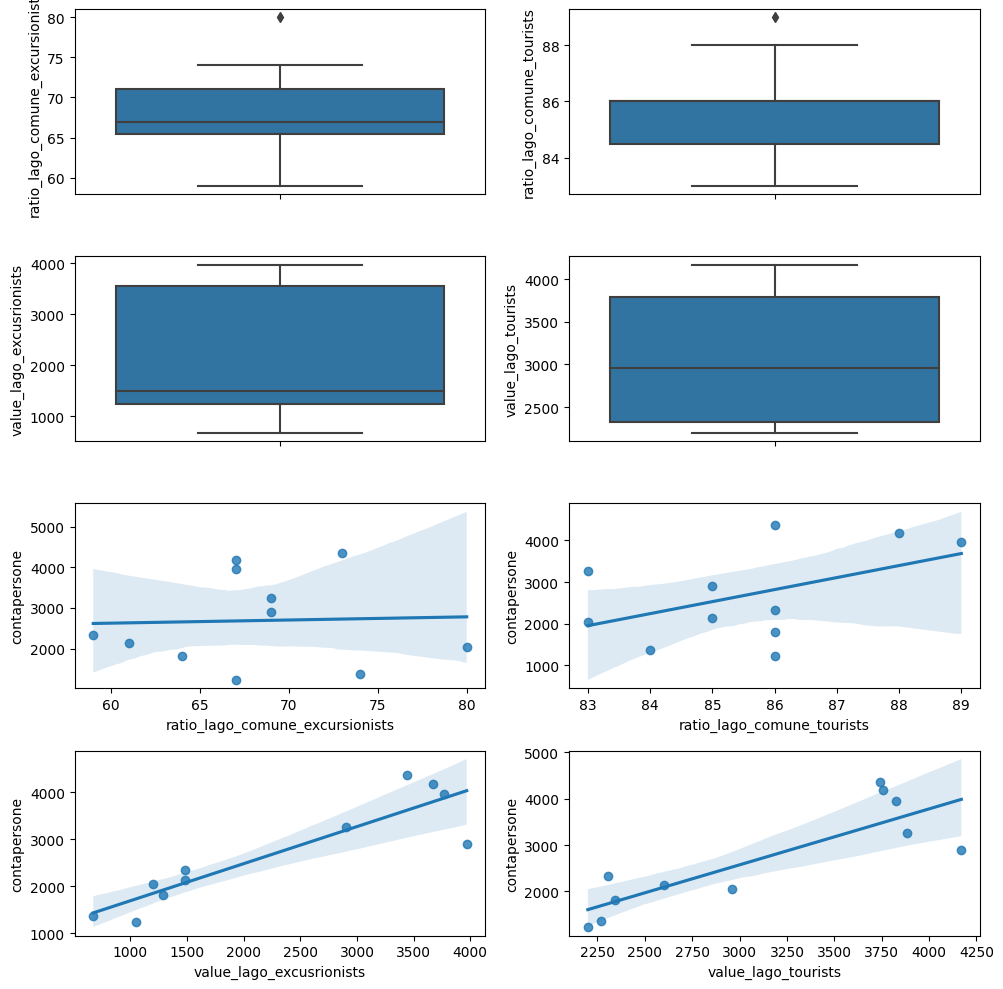

In [249]:
fig, axs = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))
sns.boxplot(y=after_ferragosto_vod_contapersone_df["ratio_lago_comune_excursionists"], ax = axs[0, 0])
sns.boxplot(y=after_ferragosto_vod_contapersone_df["ratio_lago_comune_tourists"], ax = axs[0, 1])
sns.boxplot(y=after_ferragosto_vod_contapersone_df["value_lago_excusrionists"], ax = axs[1, 0])
sns.boxplot(y=after_ferragosto_vod_contapersone_df["value_lago_tourists"], ax = axs[1, 1])
sns.regplot(y = after_ferragosto_vod_contapersone_df['contapersone'], x = after_ferragosto_vod_contapersone_df['ratio_lago_comune_excursionists'], ax = axs[2, 0])
sns.regplot(y = after_ferragosto_vod_contapersone_df['contapersone'], x = after_ferragosto_vod_contapersone_df['ratio_lago_comune_tourists'], ax = axs[2, 1])
sns.regplot(y = after_ferragosto_vod_contapersone_df['contapersone'], x = after_ferragosto_vod_contapersone_df['value_lago_excusrionists'], ax = axs[3, 0])
sns.regplot(y = after_ferragosto_vod_contapersone_df['contapersone'], x = after_ferragosto_vod_contapersone_df['value_lago_tourists'], ax = axs[3, 1])
plt.tight_layout()

In [260]:
vodafone_contapersone_df

,date,ratio_lago_comune_excursionists,value_lago_excusrionists,ratio_lago_comune_tourists,value_lago_tourists,contapersone
0,2023-07-15,67,3636,82,3833,1496
1,2023-07-16,72,4756,84,3660,2143
2,2023-07-17,66,2818,83,3149,1663
3,2023-07-18,65,2518,83,3049,1518
4,2023-07-19,65,1871,84,3015,1345
...,...,...,...,...,...,...
65,2023-09-18,96,593,78,1085,1081
66,2023-09-19,58,737,81,1281,1468
67,2023-09-20,73,830,78,1384,1699
68,2023-09-21,76,850,78,1678,2382


## Linear Regression

In [235]:
# Step 1: Train test split
from sklearn.model_selection import train_test_split

X = vodafone_contapersone_df.iloc[:, 1: -1].values
y = vodafone_contapersone_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [236]:
# Step 2: Standardisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [237]:
# Step 3: Apply PCA transformation
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [262]:
pca.components_

array([[ 0.05123019,  0.61079125,  0.54836096,  0.5688671 ],
       [ 0.98373588,  0.03522586, -0.17173198,  0.03912774]])

In [238]:
explained_variance

array([0.63379513, 0.25419598])

In [239]:
# Step 4: Fitting Linear Regression To the training set
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression() 
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [240]:
# prints y-intercept
print(linear_regressor.intercept_)
# prints the coefficient
print(linear_regressor.coef_)

2135.1964285714284
[415.23060868 302.26448175]


In [259]:
for i, val in enumerate(linear_regressor.coef_):
    print(i, val)

0 415.23060868376416
1 302.2644817450129


In [241]:
y_test

array([2213, 2495, 2132, 2586, 3560, 2597, 1396, 1282, 3944, 1030, 3491,
       2469, 4676, 3255])

In [242]:
y_pred

array([2006.09565032, 1944.23062757, 1147.74615834, 2089.28465607,
       2515.5346482 , 2132.61477023, 1510.03113397, 1210.4042153 ,
       1894.53674887, 3664.78186671, 2124.7646866 , 2949.73562944,
       2363.02579186, 2339.96341652])

# Compare the ratio of visitors on the beach to the visitors in Molveno

In [279]:
# presences on the beach
vod_presences_andalo = grouped_vodafone_presences[grouped_vodafone_presences["locId"] == LOC_ID_COMUNE_ANDALO]
vod_presences_andalo["date"] = pd.to_datetime(vod_presences_andalo["date"])
vod_presences_andalo


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,locId,userProfile,value
219,2022-01-01,166,COMMUTER,314
220,2022-01-01,166,INHABITANT,1066
221,2022-01-01,166,TOURIST,10564
222,2022-01-01,166,VISITOR,5871
797,2022-01-02,166,COMMUTER,308
...,...,...,...,...
477765,2024-03-30,166,VISITOR,1377
478347,2024-03-31,166,COMMUTER,192
478348,2024-03-31,166,INHABITANT,858
478349,2024-03-31,166,TOURIST,2242


In [280]:
vod_presences_andalo.dtypes

date           datetime64[ns]
locId                  object
userProfile            object
value                   int64
dtype: object

In [285]:
attendance_molveno_andalo_lago = merged_presences_molveno_lago.merge(vod_presences_andalo, on=["date", "userProfile"]).rename(columns={"locId": "locId_andalo", "value": "value_andalo"})
attendance_molveno_andalo_lago

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,locId_andalo,value_andalo
0,2023-07-15,27,TOURIST,4635,LAGO_MOLV,3833,82,166,5587
1,2023-07-15,27,VISITOR,5396,LAGO_MOLV,3636,67,166,2743
2,2023-07-16,27,TOURIST,4357,LAGO_MOLV,3660,84,166,6036
3,2023-07-16,27,VISITOR,6592,LAGO_MOLV,4756,72,166,3143
4,2023-07-17,27,TOURIST,3775,LAGO_MOLV,3149,83,166,4670
...,...,...,...,...,...,...,...,...,...
135,2023-09-20,27,VISITOR,1126,LAGO_MOLV,830,73,166,751
136,2023-09-21,27,TOURIST,2129,LAGO_MOLV,1678,78,166,598
137,2023-09-21,27,VISITOR,1109,LAGO_MOLV,850,76,166,1223
138,2023-09-22,27,TOURIST,2550,LAGO_MOLV,2015,79,166,770


In [289]:
attendance_molveno_andalo_lago["ratio_lago_MolvenoAndalo"] = (attendance_molveno_andalo_lago["value_lago"] / (attendance_molveno_andalo_lago["value_molveno"] + attendance_molveno_andalo_lago["value_andalo"]) ) * 100
# TODO
attendance_molveno_andalo_lago["ratio_lago_MolvenoAndalo"] = attendance_molveno_andalo_lago["ratio_lago_MolvenoAndalo"].replace(np.inf, 0).fillna(0)
attendance_molveno_andalo_lago["ratio_lago_MolvenoAndalo"] = attendance_molveno_andalo_lago["ratio_lago_MolvenoAndalo"].apply(lambda el: int(el))
attendance_molveno_andalo_lago.sort_values(by=["ratio_lago_MolvenoAndalo"], ascending=False)

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,locId_andalo,value_andalo,ratio_lago_MolvenoAndalo
136,2023-09-21,27,TOURIST,2129,LAGO_MOLV,1678,78.816346,166,598,61
138,2023-09-22,27,TOURIST,2550,LAGO_MOLV,2015,79.019608,166,770,60
130,2023-09-18,27,TOURIST,1377,LAGO_MOLV,1085,78.794481,166,439,59
134,2023-09-20,27,TOURIST,1768,LAGO_MOLV,1384,78.280543,166,607,58
63,2023-08-15,27,VISITOR,8808,LAGO_MOLV,6723,76.328338,166,3867,53
...,...,...,...,...,...,...,...,...,...,...
105,2023-09-05,27,VISITOR,1666,LAGO_MOLV,980,58.823529,166,1407,31
35,2023-08-01,27,VISITOR,1522,LAGO_MOLV,1041,68.396846,166,1896,30
103,2023-09-04,27,VISITOR,892,LAGO_MOLV,663,74.327354,166,1318,30
89,2023-08-28,27,VISITOR,900,LAGO_MOLV,671,74.555556,166,1333,30


<Axes: xlabel='date'>

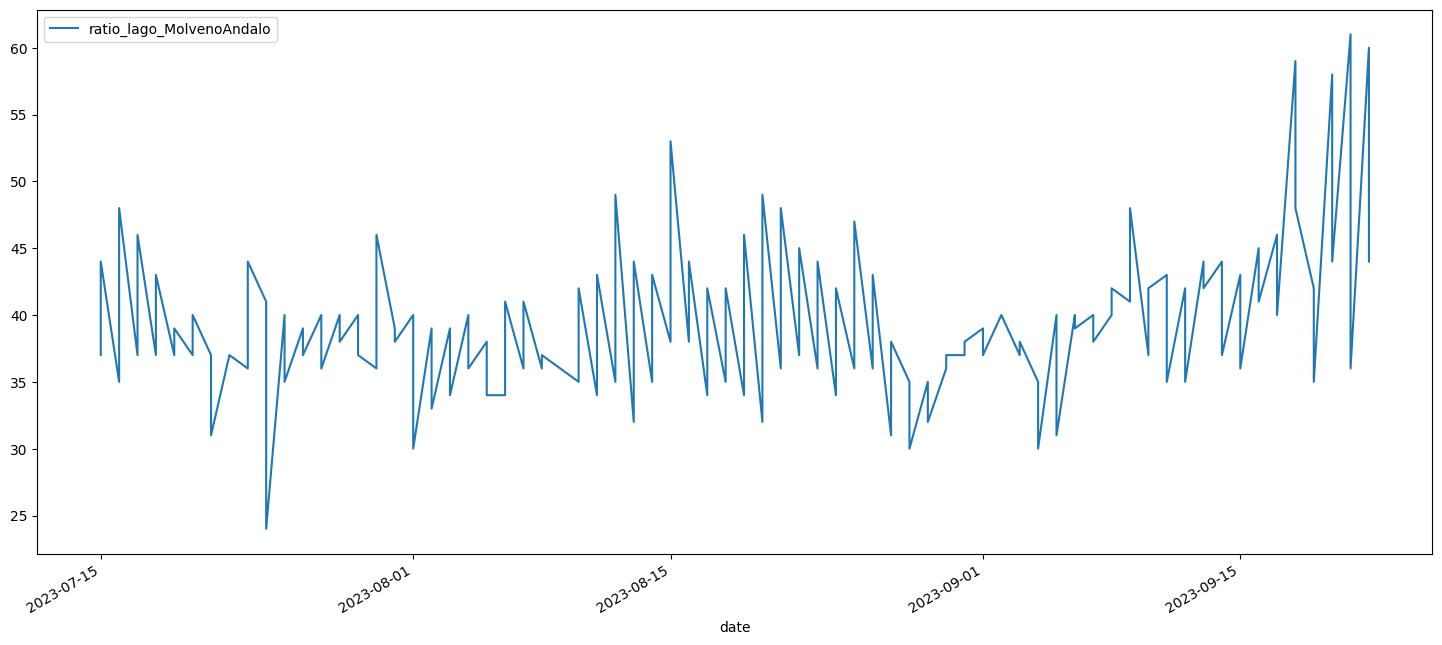

In [292]:
attendance_molveno_andalo_lago.plot(x="date", y="ratio_lago_MolvenoAndalo", figsize=(18, 8))

# Factors that may affect attendances at apiaggia

## Events


In [42]:
manifestazioni_df2 = manifestazioni_df[(manifestazioni_df["nr"] != "0") & (manifestazioni_df["nr"] != "0.0")]
manifestazioni_df2

,nr,richiedente,manifestazione,luogo,data_manifestazione_inizio,data_manifestazione_fine,partecipanti_dichiarati,spesa,spesa_ritenuta_ammissibile,doc_tm_sra_200000,punti,percentuale_intervento,contributo,typology
0,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2023-03-12 00:00:00,2023-03-18 00:00:00,5000,80000,80000,non serve,52.0,0.1,8000,2023_first_part
1,16,Centro Sportivo Italiano Presidenza Nazionale,XXIV Campionato Nazionale CSI di Sci,Andalo,2023-03-16 00:00:00,2023-03-19 00:00:00,750,70000,70000,non serve,67.0,0.15,10500,2023_first_part
2,37,Royal Academy of Dance srl,Scuola Estiva Internazionale Royal Academy of ...,Altopiano Paganella,2023-06-26 00:00:00,2023-07-08 00:00:00,1500,184000,184000,non serve,60.0,0.1,18400,2023_first_part
3,61,A.S.D. PowerStage,2° Dolomiti Brenta Rally,Andalo,2023-04-21 00:00:00,2023-04-22 00:00:00,3000,95000,95000,non serve,42.0,0.1,9500,2023_first_part
5,69,X-Tribe società sportiva dilettantistica a res...,Xterra World Championship 2023 Molveno Trentin...,Molveno -Andalo,2023-09-21 00:00:00,2023-09-24 00:00:00,3500,500000,500000,si,65.5,0.35,175000,2023_first_part
8,14.0,Gruppo Ciclistico Zambana,Criterium Gruppo Ciclistico Zambana,Paganella,2023-07-05 00:00:00,2023-08-20 00:00:00,20000.0,10100.0,10100.0,non serve,43.5,0.1,1010,2023_second_part
9,23.0,Molveno Holiday Scarl,XTERRA Dolomiti di Brenta Trail,Molveno,2023-09-09 00:00:00,2023-09-09 00:00:00,2300.0,60000.0,60000.0,non serve,67.0,0.15,9000,2023_second_part
10,37.0,Consorzio Fai Attività Iniziative e Vacanze In...,Orme-Festival dei sentieri sesta edizione,Fai della Paganella,2023-09-08 00:00:00,2023-09-10 00:00:00,3500.0,65000.0,65000.0,non serve,54.0,0.1,6500,2023_second_part
12,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2024-01-27 00:00:00,2024-03-16 00:00:00,6000,96000.0,96000.0,non serve,52,0.1,9600,2024_first_part
13,29,Trentino Mountain Bike Associazione Sportiva D...,15° Circuito Trentino MTB,0,2024-06-09 00:00:00,2024-10-30 00:00:00,25000,62000.0,62000.0,non serve,80.5,0.15,9300,2024_first_part


In [43]:
manifestazioni_df2["data_manifestazione_inizio"] = pd.to_datetime(manifestazioni_df2["data_manifestazione_inizio"])
manifestazioni_df2["data_manifestazione_fine"] = pd.to_datetime(manifestazioni_df2["data_manifestazione_fine"])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [44]:
eventi = pd.DataFrame(columns=["event_name", "date", "organizer", "location", "tot_participants", "participants"])
manifestazioni_df2["partecipanti_dichiarati"] = manifestazioni_df2["partecipanti_dichiarati"].astype(float).astype(int)
manifestazioni_filtered_df = manifestazioni_df2[manifestazioni_df2["data_manifestazione_inizio"] < "2024-01-27 00:00:00"]
manifestazioni_filtered_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,nr,richiedente,manifestazione,luogo,data_manifestazione_inizio,data_manifestazione_fine,partecipanti_dichiarati,spesa,spesa_ritenuta_ammissibile,doc_tm_sra_200000,punti,percentuale_intervento,contributo,typology
0,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2023-03-12,2023-03-18,5000,80000,80000,non serve,52.0,0.1,8000,2023_first_part
1,16,Centro Sportivo Italiano Presidenza Nazionale,XXIV Campionato Nazionale CSI di Sci,Andalo,2023-03-16,2023-03-19,750,70000,70000,non serve,67.0,0.15,10500,2023_first_part
2,37,Royal Academy of Dance srl,Scuola Estiva Internazionale Royal Academy of ...,Altopiano Paganella,2023-06-26,2023-07-08,1500,184000,184000,non serve,60.0,0.1,18400,2023_first_part
3,61,A.S.D. PowerStage,2° Dolomiti Brenta Rally,Andalo,2023-04-21,2023-04-22,3000,95000,95000,non serve,42.0,0.1,9500,2023_first_part
5,69,X-Tribe società sportiva dilettantistica a res...,Xterra World Championship 2023 Molveno Trentin...,Molveno -Andalo,2023-09-21,2023-09-24,3500,500000,500000,si,65.5,0.35,175000,2023_first_part
8,14.0,Gruppo Ciclistico Zambana,Criterium Gruppo Ciclistico Zambana,Paganella,2023-07-05,2023-08-20,20000,10100.0,10100.0,non serve,43.5,0.1,1010,2023_second_part
9,23.0,Molveno Holiday Scarl,XTERRA Dolomiti di Brenta Trail,Molveno,2023-09-09,2023-09-09,2300,60000.0,60000.0,non serve,67.0,0.15,9000,2023_second_part
10,37.0,Consorzio Fai Attività Iniziative e Vacanze In...,Orme-Festival dei sentieri sesta edizione,Fai della Paganella,2023-09-08,2023-09-10,3500,65000.0,65000.0,non serve,54.0,0.1,6500,2023_second_part


In [45]:
D = "D"
for event in manifestazioni_filtered_df.itertuples():
    start_date = event.data_manifestazione_inizio
    end_date = event.data_manifestazione_fine
    organizer = event.richiedente
    event_name = event.manifestazione
    location = event.luogo
    participants = int(event.partecipanti_dichiarati)
    random_participants = 0
    if participants > 0:
        date_list = pd.date_range(start_date, end_date, freq=D)       
        mean_nr = participants/len(date_list)
        for date in date_list:
            random_participants = np.random.randint(0, mean_nr)            
            row = {"event_name": event_name, "date": date , "organizer": organizer, "location": location, "tot_participants": participants, "participants": random_participants}
            eventi.loc[len(eventi)] = row
eventi = eventi[(eventi["date"] >= START_DATE) & (eventi["date"] < END_DATE)]
eventi

,event_name,date,organizer,location,tot_participants,participants
16,Scuola Estiva Internazionale Royal Academy of ...,2023-07-01,Royal Academy of Dance srl,Altopiano Paganella,1500,100
17,Scuola Estiva Internazionale Royal Academy of ...,2023-07-02,Royal Academy of Dance srl,Altopiano Paganella,1500,21
18,Scuola Estiva Internazionale Royal Academy of ...,2023-07-03,Royal Academy of Dance srl,Altopiano Paganella,1500,46
19,Scuola Estiva Internazionale Royal Academy of ...,2023-07-04,Royal Academy of Dance srl,Altopiano Paganella,1500,0
20,Scuola Estiva Internazionale Royal Academy of ...,2023-07-05,Royal Academy of Dance srl,Altopiano Paganella,1500,39
...,...,...,...,...,...,...
76,Criterium Gruppo Ciclistico Zambana,2023-08-20,Gruppo Ciclistico Zambana,Paganella,20000,54
77,XTERRA Dolomiti di Brenta Trail,2023-09-09,Molveno Holiday Scarl,Molveno,2300,2142
78,Orme-Festival dei sentieri sesta edizione,2023-09-08,Consorzio Fai Attività Iniziative e Vacanze In...,Fai della Paganella,3500,189
79,Orme-Festival dei sentieri sesta edizione,2023-09-09,Consorzio Fai Attività Iniziative e Vacanze In...,Fai della Paganella,3500,1122


In [46]:
eventi["scaled_total_participants"] = scaler.fit_transform(eventi[["tot_participants"]]) 
eventi["scaled_daily_participants"] = scaler.fit_transform(eventi[["participants"]]) 

<AxesSubplot: xlabel='date'>

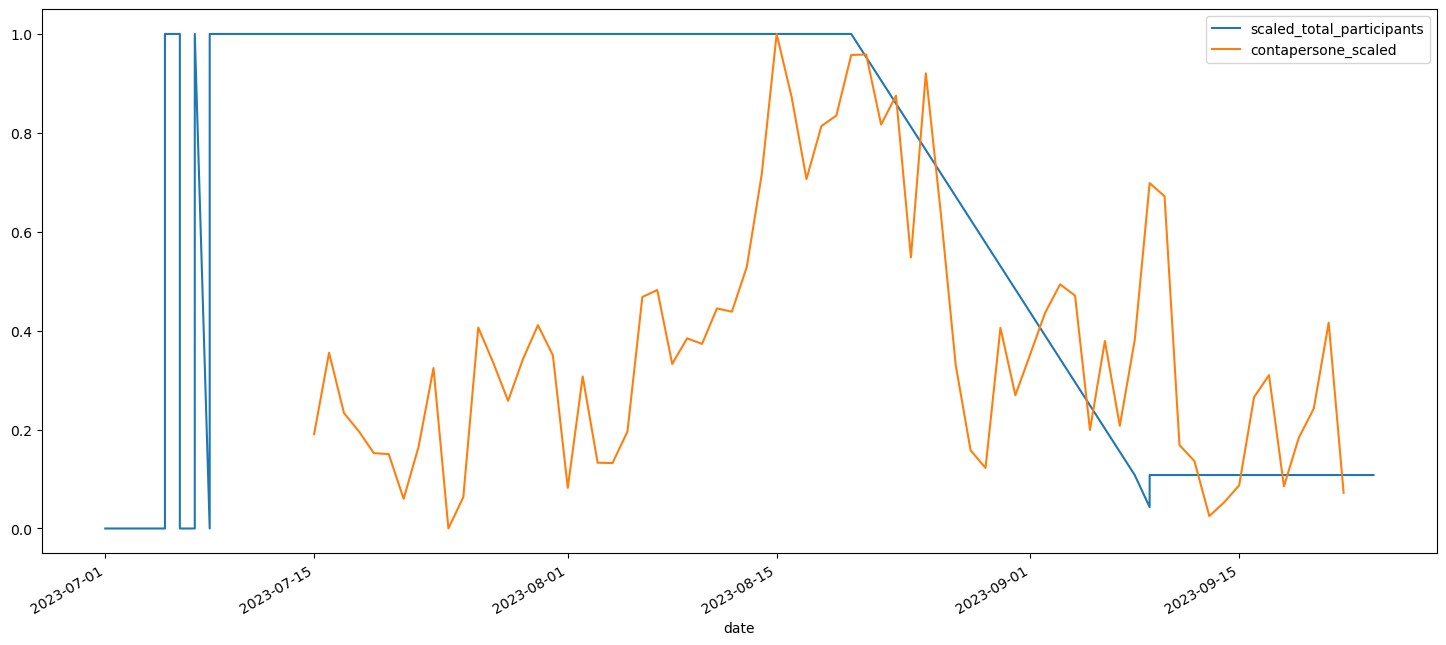

In [47]:
ax = eventi.plot(x="date", y="scaled_total_participants", figsize=(18,8))
contapersone[["date", "contapersone_scaled"]].plot(ax=ax, x="date", y="contapersone_scaled", figsize=(18,8))
#eventi.plot(ax=ax, x="date", y="scaled_daily_participants", figsize=(18,8)) #this is a random generated number

## Meteo

In [76]:
meteotrentino_bollettino_df.rename(columns={"data": "date"}, inplace=True)
meteotrentino_bollettino_df["date"] = pd.to_datetime(meteotrentino_bollettino_df["date"])
meteo_timeframe_df = meteotrentino_bollettino_df[
    (meteotrentino_bollettino_df["comune"].str.contains("MOLVENO")) &
    (meteotrentino_bollettino_df["date"] >= START_DATE) &
    (meteotrentino_bollettino_df["date"] <= END_DATE)
]

In [77]:
meteo_timeframe_df["tmin_scaled"] = scaler.fit_transform(meteo_timeframe_df[["tmin"]])
meteo_timeframe_df["tmax_scaled"] = scaler.fit_transform(meteo_timeframe_df[["tmax"]])
meteo_timeframe_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,comune,ambito,meteo,tmin,tmax,probprec06-12,intprec06-12,probtemp06-12,probprec12-18,intprec12-18,probtemp12-18,tmin_scaled,tmax_scaled
36742,2023-07-01,MOLVENO,DOLOMITI,Molto nuvoloso con piogge deboli,14,24,media,moderata,media,media,moderata,media,0.383670,-0.272592
36784,2023-07-04,MOLVENO,DOLOMITI,Nuvoloso,13,23,molto bassa,debole,molto bassa,media,moderata,media,0.027405,-0.540040
36806,2023-07-06,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,12,23,media,debole,media,alta,moderata,alta,-0.328860,-0.540040
36816,2023-07-08,MOLVENO,DOLOMITI,Poco nuvoloso,13,26,media,debole,molto bassa,bassa,debole,bassa,0.027405,0.262305
36841,2023-07-11,MOLVENO,DOLOMITI,Poco nuvoloso,18,31,molto bassa,debole,molto bassa,bassa,debole,bassa,1.808728,1.599548
36863,2023-07-14,MOLVENO,DOLOMITI,Poco nuvoloso,12,26,molto bassa,debole,molto bassa,molto bassa,debole,molto bassa,-0.328860,0.262305
36885,2023-07-15,MOLVENO,DOLOMITI,Sereno,13,27,molto bassa,debole,molto bassa,molto bassa,debole,molto bassa,0.027405,0.529754
36907,2023-07-16,MOLVENO,DOLOMITI,Sereno,14,27,molto bassa,debole,molto bassa,bassa,debole,bassa,0.383670,0.529754
36929,2023-07-17,MOLVENO,DOLOMITI,Poco nuvoloso,16,28,molto bassa,debole,molto bassa,bassa,debole,bassa,1.096199,0.797202
36951,2023-07-19,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,15,28,bassa,debole,bassa,alta,moderata,alta,0.739934,0.797202


<Axes: xlabel='date'>

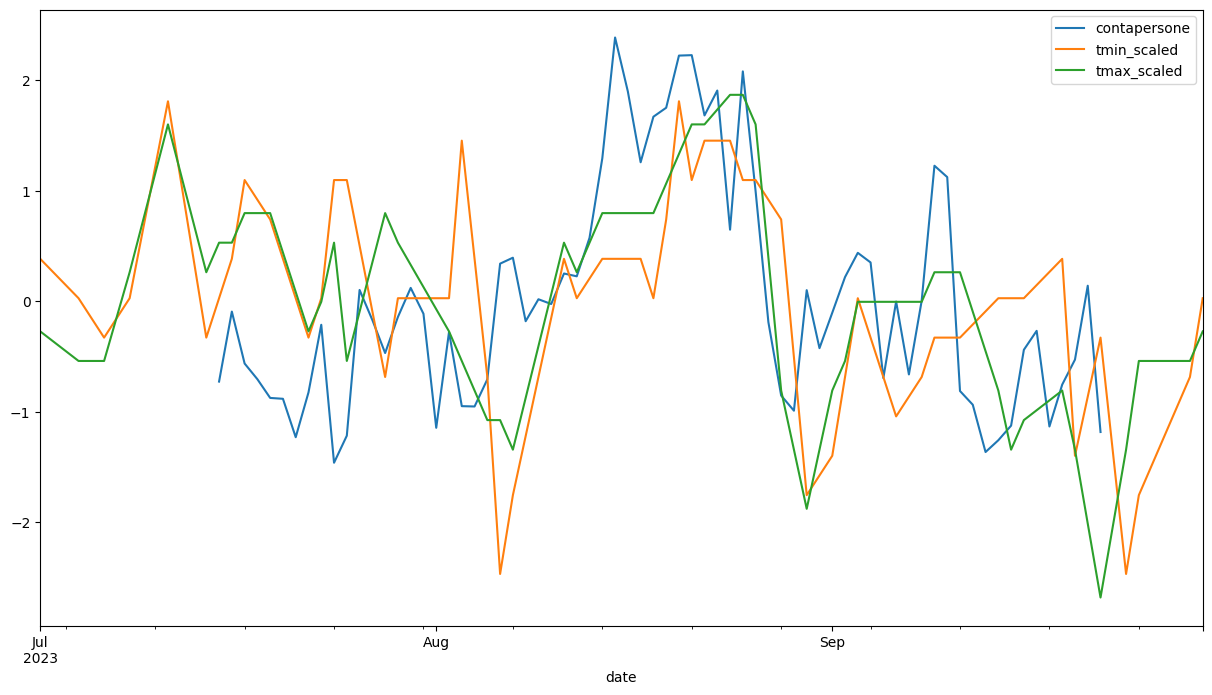

In [78]:
ax = contapersone[["date", "contapersone_scaled"]].plot(x="date", y="contapersone_scaled", label="contapersone")
meteo_timeframe_df.plot(ax=ax, x="date", y="tmin_scaled", figsize=(15, 8))
meteo_timeframe_df.plot(ax=ax, x="date", y="tmax_scaled", figsize=(15, 8))


In [79]:
correlation_df = pd.concat([
    meteo_timeframe_df[["date", "tmin_scaled", "tmax_scaled"]].set_index("date"),
    contapersone[["date", "contapersone_scaled"]].set_index("date")    
], axis=1)
correlation_df.corr()

,tmin_scaled,tmax_scaled,contapersone_scaled
tmin_scaled,1.000000,0.667118,0.221367
tmax_scaled,0.667118,1.000000,0.617659
contapersone_scaled,0.221367,0.617659,1.000000


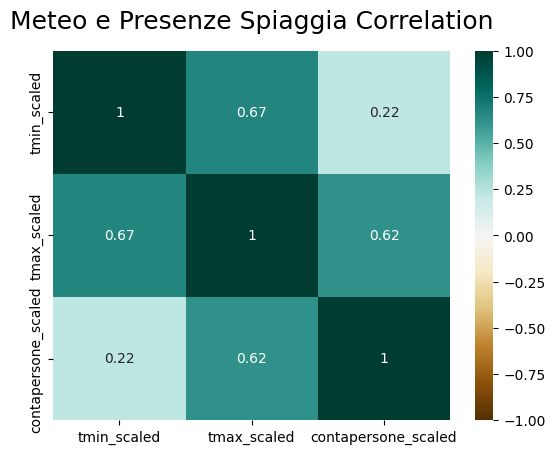

In [80]:
heatmap = sns.heatmap(correlation_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Meteo e Presenze Spiaggia Correlation', fontdict={'fontsize':18}, pad=16);

In [81]:
correlation_contapersone_meteo_df = correlation_df[correlation_df["contapersone_scaled"].notna()].reset_index()
correlation_contapersone_meteo_df

,date,tmin_scaled,tmax_scaled,contapersone_scaled
0,2023-07-15,0.027405,0.529754,-0.726637
1,2023-07-16,0.383670,0.529754,-0.093484
2,2023-07-17,1.096199,0.797202,-0.563211
3,2023-07-18,NaN,NaN,-0.705108
4,2023-07-19,0.739934,0.797202,-0.874406
...,...,...,...,...
65,2023-09-18,NaN,NaN,-1.132755
66,2023-09-19,0.383670,-0.807489,-0.754038
67,2023-09-20,-1.397654,-1.342386,-0.527982
68,2023-09-21,NaN,NaN,0.140401


### Linear Regression

In [87]:
vodafone_contapersone_meteo_df = meteo_timeframe_df.merge(vodafone_contapersone_df, on="date")
vodafone_contapersone_meteo_df = vodafone_contapersone_meteo_df[["tmin", "tmax", "ratio_lago_comune_excursionists", "value_lago_excusrionists", "ratio_lago_comune_tourists", "value_lago_tourists", "contapersone"]]
vodafone_contapersone_meteo_df

,tmin,tmax,ratio_lago_comune_excursionists,value_lago_excusrionists,ratio_lago_comune_tourists,value_lago_tourists,contapersone
0,13,27,67,3636,82,3833,1496
1,14,27,72,4756,84,3660,2143
2,16,28,66,2818,83,3149,1663
3,15,28,65,1871,84,3015,1345
4,12,24,63,2308,85,3772,1396
5,13,25,67,3621,87,3737,2021
6,16,27,55,1003,91,3265,746
7,16,23,65,1294,89,2953,996
8,11,28,61,2055,89,3322,1760
9,13,27,59,2446,87,3833,2093


In [141]:
y

array([1496, 2143, 1663, 1345, 1396, 2021,  746,  996, 1760, 2093, 1954,
       1269, 1517, 2586, 2641, 2495, 2469, 3560, 3523, 3944, 4027, 4509,
       4513, 3956, 2900, 4363, 3255, 1367, 2341, 2132, 2462, 2686, 2236,
       2243, 3491, 1409,  954, 1089, 1790, 1468, 1699, 1030])

In [119]:
# Step 1: Train test split
from sklearn.model_selection import train_test_split

X = vodafone_contapersone_meteo_df.iloc[:, 1:-1].values
y = vodafone_contapersone_meteo_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [120]:
# Step 2: Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
# Step 3: Apply PCA transformation
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [122]:
explained_variance

array([0.51594451, 0.30444895])

In [123]:
# Step 4: Fitting Linear Regression To the training set
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression() 
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [139]:
# prints y-intercept
print(linear_regressor.intercept_)
# prints the coefficient
print(linear_regressor.coef_)

2434.6060606060605
[443.11302401 145.79106288]


In [245]:
#Predicting
y_pred = linear_regressor.predict(X_test) # make predictionsc
#plt.plot(X_test, y_test,'rx')
#plt.plot(X_test, y_pred, color='black')
#plt.grid()
#plt.show()

## Timeframe of one week after ferragosto


## Weekend days vs weekdays

## Holidays